# Исследование оттока клиентов банка

Отдел маркетинга запросил у нас данное исследование с целью выделения сегментов пользователей и дальнейшей работе по борьбе с высоким оттоком клиентов.

В ходе данного исследования планируется выполнить следующие шаги:
1. Предобработка данных;
    1. Проверить данные на дубликаты, пропуски;
    2. Проверить названия колонок и типы данных;
    3. Проверить на аномалии.
2. Исследовательский анализ данных;
    1. Построить распределения по имеющимся показателям;
    2. Определить все значимые признаки отточности;
    3. Составить и сравнить портреты типичных клиентов;
    4. Провести корреляционный анализ.
3. Проверка статистических гипотез;
    1. Гипотеза различия дохода между теми клиентами, которые ушли и теми, которые остались;
    2. (Вторая гипотеза)
    3. Промежуточный вывод о влиянии показателей на отток клиентов.
4. Сегментация клиентов;
    1. Выбрать показатели, по которым можно объединить клиентов в определенные сегменты;
    2. Сформировать сегменты клиентов;
5. Итоговый вывод.
    1. Дать возможные рекомендации по взаимодействию с сегментами на основе проведенного анализа;

### Часть первая. Предобработка данных.

In [1]:
# Загружаем необходимые библиотеки
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px 
from plotly import graph_objects as go
from scipy import stats as st
import numpy as np
from itertools import product, combinations

In [2]:
data = pd.read_csv('/datasets/bank_scrooge.csv')

In [3]:
data.info()
display(data.head(10))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   USERID         10000 non-null  int64  
 1   score          10000 non-null  float64
 2   city           10000 non-null  object 
 3   gender         10000 non-null  object 
 4   age            9974 non-null   float64
 5   equity         10000 non-null  int64  
 6   balance        7705 non-null   float64
 7   products       10000 non-null  int64  
 8   credit_card    10000 non-null  int64  
 9   last_activity  10000 non-null  int64  
 10  EST_SALARY     10000 non-null  float64
 11  churn          10000 non-null  int64  
dtypes: float64(4), int64(6), object(2)
memory usage: 937.6+ KB


,USERID,score,city,gender,age,equity,balance,products,credit_card,last_activity,EST_SALARY,churn
0,183012,850.0,Рыбинск,Ж,25.0,1,59214.82,2,0,1,75719.14,1
1,146556,861.0,Рыбинск,Ж,37.0,5,850594.33,3,1,0,86621.77,0
2,120722,892.0,Рыбинск,Ж,30.0,0,NaN,1,1,1,107683.34,0
3,225363,866.0,Ярославль,Ж,51.0,5,1524746.26,2,0,1,174423.53,1
4,157978,730.0,Ярославль,М,34.0,5,174.00,1,1,0,67353.16,1
5,202305,856.0,Рыбинск,М,56.0,4,863687.24,3,1,0,156619.80,0
6,177259,807.0,Ярославль,Ж,39.0,3,405042.44,3,0,1,103838.32,0
7,218868,825.0,Ярославль,Ж,38.0,4,458145.40,2,1,1,68085.48,0
8,211686,923.0,Ярославль,М,54.0,5,1206337.87,2,1,0,155371.79,0
9,133130,906.0,Ярославль,Ж,67.0,0,NaN,1,0,1,238055.53,0


In [4]:
# Переименуем столбцы, приведя их к нижнему регистру
data = data.rename(columns={'USERID': 'user_id', 'EST_SALARY':'est_salary'})

In [5]:
data.duplicated().sum()

0

In [6]:
data.duplicated(['user_id']).sum()

73

In [7]:
display(data[data.duplicated(subset=['user_id'], keep=False)].head(10))

,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn
7,218868,825.0,Ярославль,Ж,38.0,4,458145.40,2,1,1,68085.48,0
58,164676,860.0,Ярославль,М,37.0,5,648594.03,2,1,1,213586.86,1
150,185748,850.0,Рыбинск,М,36.0,5,1203376.67,2,0,1,89401.82,1
161,197364,928.0,Рыбинск,Ж,53.0,6,1347183.86,2,0,1,168189.49,1
231,190253,823.0,Рыбинск,М,37.0,4,373348.39,2,0,1,131947.92,1
431,214031,856.0,Рыбинск,М,36.0,2,386426.67,4,1,1,72767.85,0
440,221197,663.0,Рыбинск,М,27.0,0,NaN,1,1,1,172573.13,0
690,152479,768.0,Рыбинск,Ж,42.0,0,126787.79,4,1,1,143233.23,1
790,170312,901.0,Ярославль,М,33.0,4,3276783.93,3,0,1,358700.96,1
869,210662,962.0,Ярославль,Ж,54.0,5,5069231.39,1,1,1,955144.85,1


In [8]:
display(data[data['user_id'] == 149365])

,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn
946,149365,877.0,Ярославль,М,41.0,5,819182.01,2,0,0,212316.47,1
8272,149365,793.0,Рыбинск,Ж,61.0,0,476496.99,2,1,1,46147.06,0


Под одним user_id скрываются совершенно разные люди, проверим, действительно это дубликаты, добавив в проверку еще несколько столбцов.

In [9]:
data.duplicated(['user_id', 'gender', 'city']).sum()

0

Если еще город клиенты могли сменить, то пол вряд ли, оставим данные без изменений, дубликаты в user_id на самом деле дубликатами не являются.

Пропуски в столбцах с возрастом и балансом было принято оставить, т.к. их нельзя заменить средним или медианным значением, без угрозы для дальнейшего анализа.

In [10]:
# Проверим данные на аномалии
print(data['gender'].unique())


['Ж' 'М']


array([[<AxesSubplot:title={'center':'user_id'}>,
        <AxesSubplot:title={'center':'score'}>,
        <AxesSubplot:title={'center':'age'}>],
       [<AxesSubplot:title={'center':'equity'}>,
        <AxesSubplot:title={'center':'balance'}>,
        <AxesSubplot:title={'center':'products'}>],
       [<AxesSubplot:title={'center':'credit_card'}>,
        <AxesSubplot:title={'center':'last_activity'}>,
        <AxesSubplot:title={'center':'est_salary'}>],
       [<AxesSubplot:title={'center':'churn'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

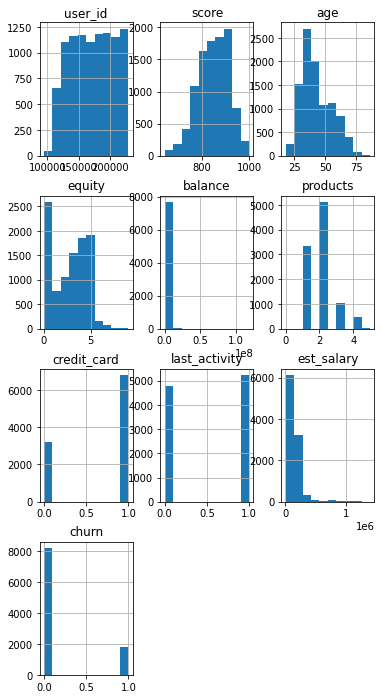

In [11]:
data.hist(figsize=(6,12))

In [12]:
display(data['age'].describe())

count    9974.000000
mean       42.734409
std        12.179971
min        18.000000
25%        33.000000
50%        40.000000
75%        51.000000
max        86.000000
Name: age, dtype: float64

In [13]:
display(data['balance'].min())
display(data['balance'].max())

0.0

119113552.01

In [14]:
display(data['products'].describe())

count    10000.000000
mean         1.870100
std          0.792647
min          0.000000
25%          1.000000
50%          2.000000
75%          2.000000
max          5.000000
Name: products, dtype: float64

Если возраст не вызывает вопросов, то вот наличие клиентов с нулевым количеством продуктов противоречит самому определению клиента.

In [15]:
display(data[data['products'] == 0])

,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn
8957,147837,962.0,Рыбинск,Ж,79.0,3,NaN,0,0,0,25063.96,1


Удалим данную строку из нашего датафрейма.

In [16]:
data = data[data['products'] != 0]
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9999 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   user_id        9999 non-null   int64  
 1   score          9999 non-null   float64
 2   city           9999 non-null   object 
 3   gender         9999 non-null   object 
 4   age            9973 non-null   float64
 5   equity         9999 non-null   int64  
 6   balance        7705 non-null   float64
 7   products       9999 non-null   int64  
 8   credit_card    9999 non-null   int64  
 9   last_activity  9999 non-null   int64  
 10  est_salary     9999 non-null   float64
 11  churn          9999 non-null   int64  
dtypes: float64(4), int64(6), object(2)
memory usage: 1015.5+ KB


Также переведем столбцы score и age из типы данных float в int.

In [17]:
data = data.dropna(subset=['age'])
data[['score', 'age']] = data[['score', 'age']].astype('int64')
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9973 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   user_id        9973 non-null   int64  
 1   score          9973 non-null   int64  
 2   city           9973 non-null   object 
 3   gender         9973 non-null   object 
 4   age            9973 non-null   int64  
 5   equity         9973 non-null   int64  
 6   balance        7695 non-null   float64
 7   products       9973 non-null   int64  
 8   credit_card    9973 non-null   int64  
 9   last_activity  9973 non-null   int64  
 10  est_salary     9973 non-null   float64
 11  churn          9973 non-null   int64  
dtypes: float64(2), int64(8), object(2)
memory usage: 1012.9+ KB


В ходе предобработки была осуществлена проверка на дубликаты, проверка на аномальные значения, переведены типы данных.

### Часть вторая. Исследовательский анализ данных.


Посчитаем процент отточности клиентов банка.

In [18]:
print(data['churn'].mean().round(4))

0.1823


Почти каждый пятый клиент уходит из нашего банка, построим распределения имеющихся показателей, чтобы понять, какими признаками обладают клиенты, которые чаще покидают банк.

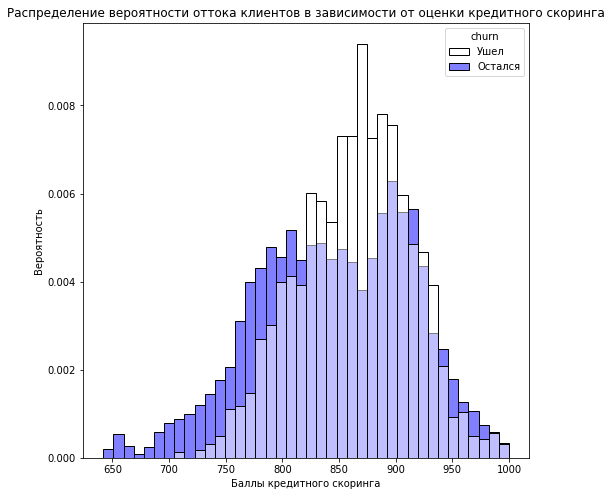

In [19]:
plt.figure(figsize=(8,8))
sns.histplot(data=data, hue=data['churn'].map({0: 'Остался', 1: 'Ушел'}), 
             x='score', stat='density', common_norm=False, palette='flag')
plt.title('Распределение вероятности оттока клиентов в зависимости от оценки кредитного скоринга')
plt.xlabel('Баллы кредитного скоринга')
plt.ylabel('Вероятность')
plt.show()

Клиенты с оценкой от 830 до 930 наиболее склонны покидать банк.

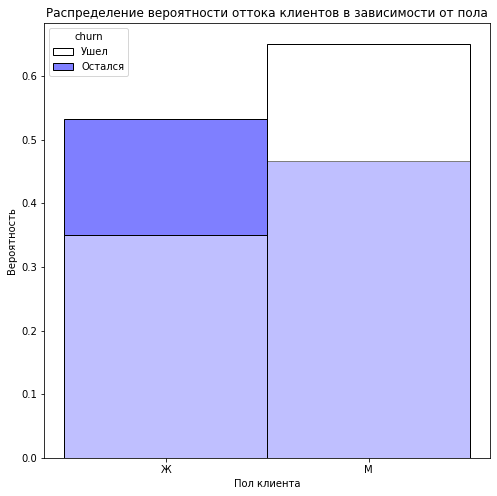

In [20]:
plt.figure(figsize=(8,8))
sns.histplot(data=data, hue=data['churn'].map({0: 'Остался', 1: 'Ушел'}), 
             x='gender', stat='density', common_norm=False, palette='flag')
plt.title('Распределение вероятности оттока клиентов в зависимости от пола')
plt.xlabel('Пол клиента')
plt.ylabel('Вероятность')
plt.show()

Женщины чаще остаются, в то время как среди мужчин отток выше.

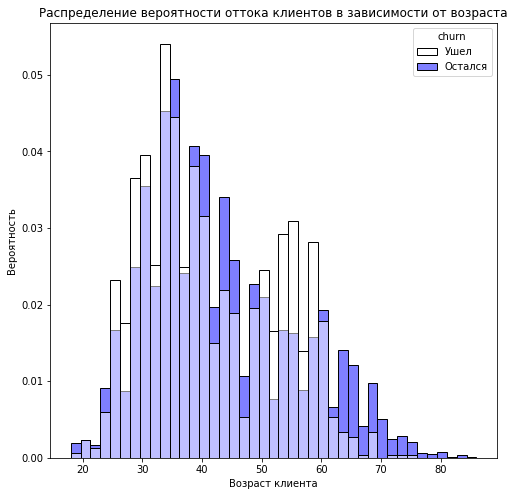

In [21]:
plt.figure(figsize=(8,8))
sns.histplot(data=data, hue=data['churn'].map({0: 'Остался', 1: 'Ушел'}), 
             x='age', stat='density', common_norm=False, palette='flag')
plt.title('Распределение вероятности оттока клиентов в зависимости от возраста')
plt.xlabel('Возраст клиента')
plt.ylabel('Вероятность')
plt.show()

Наивысший уровень оттока у клиентов с возрастом от 25 до 35, и у клиентов от 50 до 60 лет.

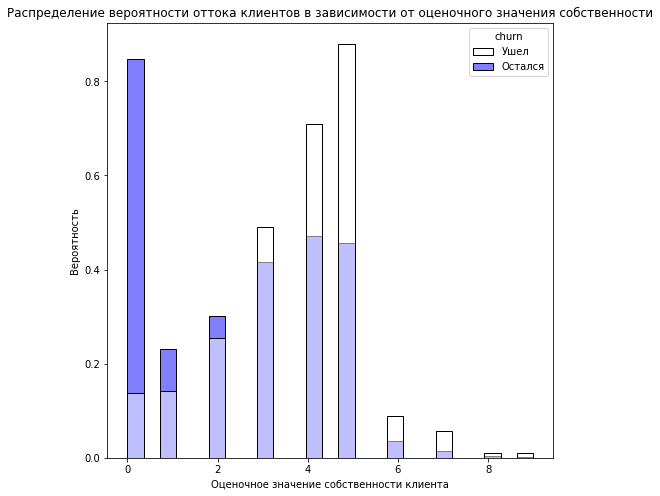

In [22]:
plt.figure(figsize=(8,8))
sns.histplot(data=data, hue=data['churn'].map({0: 'Остался', 1: 'Ушел'}), 
             x='equity', stat='density', common_norm=False, palette='flag')
plt.title('Распределение вероятности оттока клиентов в зависимости от оценочного значения собственности')
plt.xlabel('Оценочное значение собственности клиента')
plt.ylabel('Вероятность')
plt.show()

Клиенты с оценкой собственности 3 и выше также склонны чаще покидать наш банк.

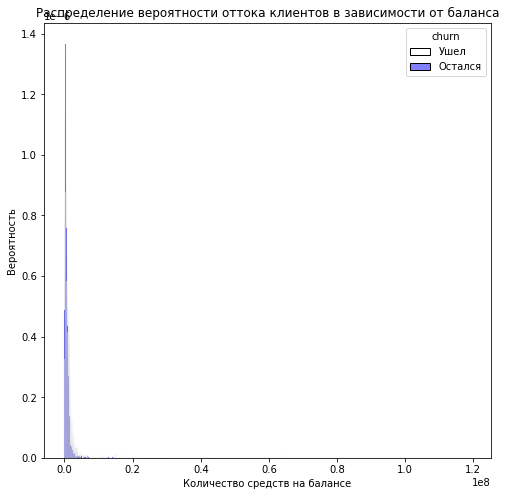

In [23]:
plt.figure(figsize=(8,8))
sns.histplot(data=data, hue=data['churn'].map({0: 'Остался', 1: 'Ушел'}), 
             x='balance', stat='density', common_norm=False, palette='flag')
plt.title('Распределение вероятности оттока клиентов в зависимости от баланса')
plt.xlabel('Количество средств на балансе')
plt.ylabel('Вероятность')
plt.show()

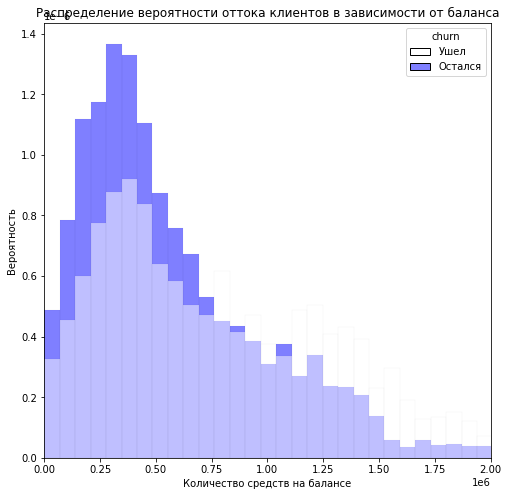

In [24]:
plt.figure(figsize=(8,8))
sns.histplot(data=data, hue=data['churn'].map({0: 'Остался', 1: 'Ушел'}), 
             x='balance', stat='density', common_norm=False, palette='flag')
plt.xlim(0, 2000000)
plt.title('Распределение вероятности оттока клиентов в зависимости от баланса')
plt.xlabel('Количество средств на балансе')
plt.ylabel('Вероятность')
plt.show()

Пользователи с балансом более 750 000 рублей более склонны покидать банк.

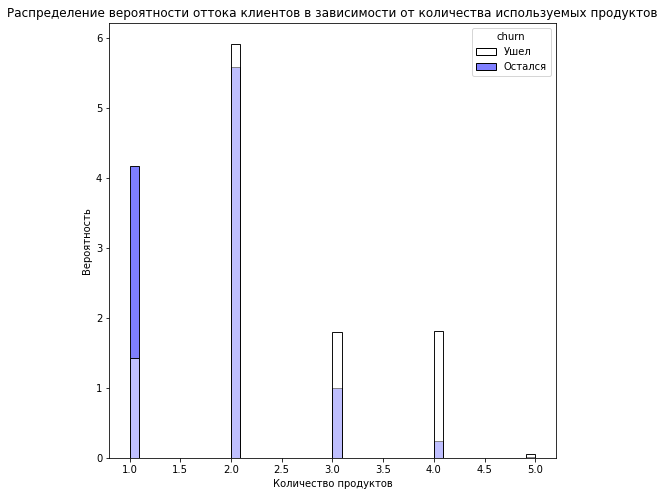

In [25]:
plt.figure(figsize=(8,8))
sns.histplot(data=data, hue=data['churn'].map({0: 'Остался', 1: 'Ушел'}), 
             x='products', stat='density', common_norm=False, palette='flag')

plt.title('Распределение вероятности оттока клиентов в зависимости от количества используемых продуктов')
plt.xlabel('Количество продуктов')
plt.ylabel('Вероятность')

plt.show()

Клиенты с 1 продуктом банка чаще остаются, а вот дальше картина меняется в обратную сторону, чем больше продуктов у клиента, тем выше вероятность его ухода.

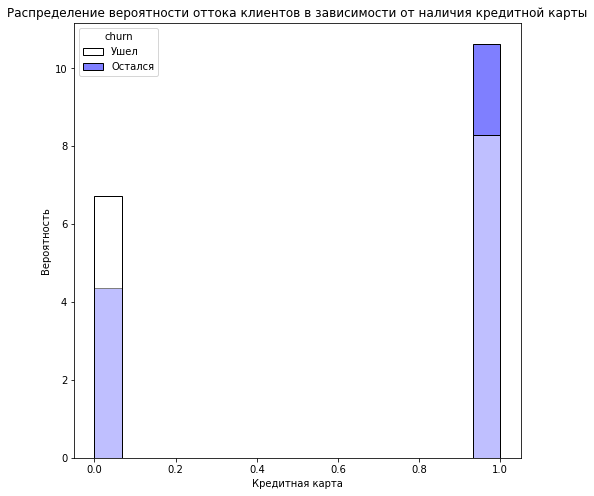

In [26]:
plt.figure(figsize=(8,8))
sns.histplot(data=data, hue=data['churn'].map({0: 'Остался', 1: 'Ушел'}), 
             x='credit_card', stat='density', common_norm=False, palette='flag')
plt.title('Распределение вероятности оттока клиентов в зависимости от наличия кредитной карты')
plt.xlabel('Кредитная карта')
plt.ylabel('Вероятность')

plt.show()

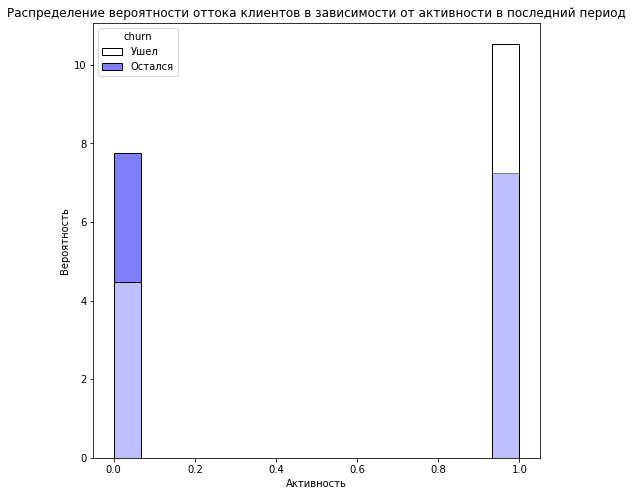

In [27]:
plt.figure(figsize=(8,8))
sns.histplot(data=data, hue=data['churn'].map({0: 'Остался', 1: 'Ушел'}), 
             x='last_activity', stat='density', common_norm=False, palette='flag')
plt.title('Распределение вероятности оттока клиентов в зависимости от активности в последний период')
plt.xlabel('Активность')
plt.ylabel('Вероятность')

plt.show()

Клиенты, которые были активны в последнее время чаще покидают банк, чем те, кто не были активны.

<AxesSubplot:xlabel='est_salary', ylabel='Density'>

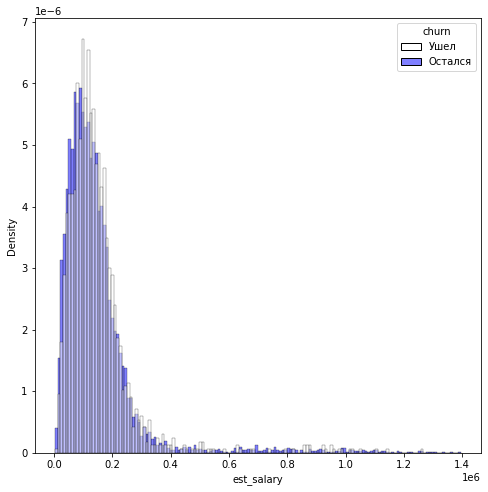

In [28]:
plt.figure(figsize=(8,8))
sns.histplot(data=data, hue=data['churn'].map({0: 'Остался', 1: 'Ушел'}), 
             x='est_salary', stat='density', common_norm=False, palette='flag')

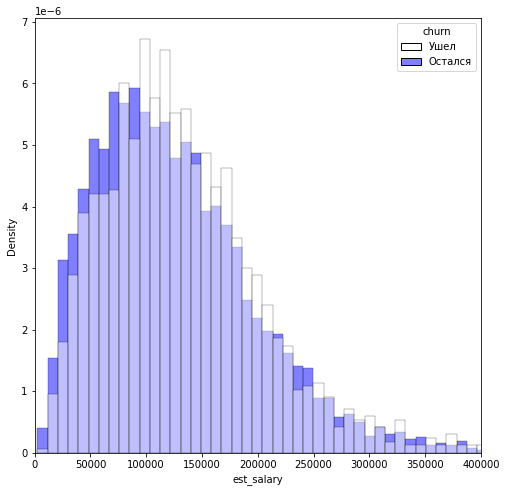

In [29]:
plt.figure(figsize=(8,8))
sns.histplot(data=data, hue=data['churn'].map({0: 'Остался', 1: 'Ушел'}), 
             x='est_salary', stat='density', common_norm=False, palette='flag')
plt.xlim(0, 400000)

plt.show()

Люди с доходом выше 100 000 также более склонны к уходу из нашего банка.

За счет построенных выше графиков складывается ощущение, что чаще всего из банка уходят именно активные и состоятельные люди, пользующиеся сразу несколькими продуктами банка, имеющими высокий доход, более 750 000 рублей на балансе и оценку собственности 3 и выше. Возможно, услуги банка не позволяют получать желаемую такими людьми выгоду.

Построим матрицу корреляций, чтобы увидеть возможные закономерности.

<AxesSubplot:>

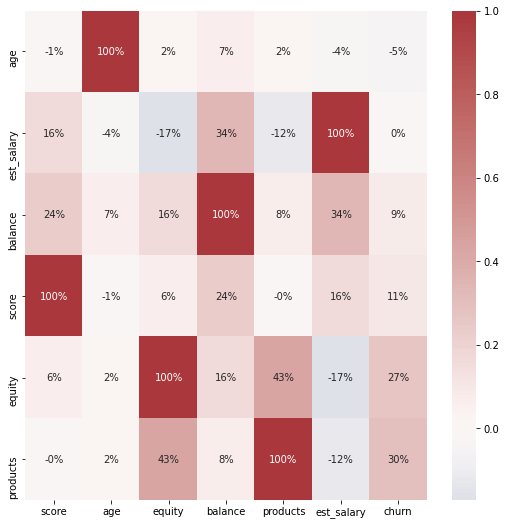

In [30]:
data_corr = data.drop(['user_id', 'credit_card', 'last_activity'], axis=1).corr()

plt.figure(figsize=(9,9))
sns.heatmap(
    data_corr.drop('churn').sort_values('churn'),
    annot=True, fmt='.0%', cmap='vlag', center=0)

Text(0.5, 1.0, 'Корреляция оттока с показателями клиентов')

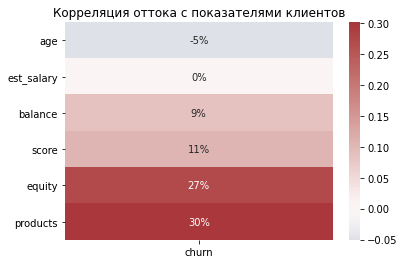

In [31]:
sns.heatmap(
    data_corr.loc[:,['churn']].drop('churn').sort_values('churn'),
    annot=True, fmt='.0%', cmap='vlag', center=0)
plt.title('Корреляция оттока с показателями клиентов')

Наибольший уровень корреляции с оттоком пользователей показывают увеличение числа продуктов, оценки собственности и активность пользователя, а вот наличие кредитной карты показывает отрицательную корреляцию, но при этом уровень корреляции во всех случаях не превышает значений для слабого уровня корреляции.

### Часть третья. Проверка статистических гипотез.

Проверим статистические гипотезы, обозначим ниже нулевые и альтернативные гипотезы:

1. Гипотеза о различии дохода между теми клиентами, которые ушли, и теми, которые остались:
    1. H0 - Средний доход оставшихся клиентов равен среднему доходу ушедших клиентов;
    2. Н1 - Средний доход ушедших клиентов больше среднего дохода оставшихся клиентов.
2. Гипотеза о различии среднего количества продуктов между теми клиентами, которые ушли, и теми, которые остались:
    1. Н0 - Среднее количество продуктов оставшихся клиентов равно среднему доходу ушедших клиентов;
    2. Н1 - Среднее количество продуктов ушедших клиентов больше среднего количества продуктов оставшихся клиентов.
3. Гипотеза о различии средней оценки собственности между теми клиентами, которые ушли, и теми, которые остались:
    1. Н0 - Средняя оценка собственности оставшихся клиентов равна средней оценке собственности ушедших клиентов;
    2. Н1 - Средняя оценка собственности ушедших клиентов выше средней оценки собственности оставшихся клиентов.

In [32]:
data_stay = data[data['churn'] == 0]
data_leave = data[data['churn'] == 1]

In [33]:
data_stay.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8155 entries, 1 to 9999
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   user_id        8155 non-null   int64  
 1   score          8155 non-null   int64  
 2   city           8155 non-null   object 
 3   gender         8155 non-null   object 
 4   age            8155 non-null   int64  
 5   equity         8155 non-null   int64  
 6   balance        5889 non-null   float64
 7   products       8155 non-null   int64  
 8   credit_card    8155 non-null   int64  
 9   last_activity  8155 non-null   int64  
 10  est_salary     8155 non-null   float64
 11  churn          8155 non-null   int64  
dtypes: float64(2), int64(8), object(2)
memory usage: 828.2+ KB


In [34]:
data_leave.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1818 entries, 0 to 9994
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   user_id        1818 non-null   int64  
 1   score          1818 non-null   int64  
 2   city           1818 non-null   object 
 3   gender         1818 non-null   object 
 4   age            1818 non-null   int64  
 5   equity         1818 non-null   int64  
 6   balance        1806 non-null   float64
 7   products       1818 non-null   int64  
 8   credit_card    1818 non-null   int64  
 9   last_activity  1818 non-null   int64  
 10  est_salary     1818 non-null   float64
 11  churn          1818 non-null   int64  
dtypes: float64(2), int64(8), object(2)
memory usage: 184.6+ KB


In [35]:
alpha = 0.05
results = st.ttest_ind(data_leave['est_salary'], data_stay['est_salary'], alternative='greater')
print(results.pvalue)
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу') 

0.42504411936290176
Не получилось отвергнуть нулевую гипотезу


Не удалось отвергнуть нулевую гипотезу о равенстве среднего дохода ушедших и оставшихся пользователей.

In [36]:
alpha = 0.05
results = st.ttest_ind(data_leave['products'], data_stay['products'], alternative='greater')
print(results.pvalue)
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу') 

1.2589373271223973e-208
Отвергаем нулевую гипотезу


Действительно, у ушедших клиентов банка больше продуктов, чем у оставшихся.

In [37]:
alpha = 0.05
results = st.ttest_ind(data_leave['equity'], data_stay['equity'], alternative='greater')
print(results.pvalue)
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу') 

1.400736274194976e-166
Отвергаем нулевую гипотезу


Оценка собственности выше у клиентов, которые ушли из банка.

Таким образом, после проверки статистических гипотез можно выделить следующие наиболее значимые признаки оттока:
1) Активность пользователей - как и сама активность в недавнее время, так и количество продуктов банка более двух;

2) Высокий доход (более 100 000 рублей), оценка собственности 3 пункта или выше и количество средств на балансе более 750 000 рублей. 

### Часть четвертая. Сегментация клиентов.

Создадим функцию, которая переберет сегменты с наибольшим уровнем оттока по 2-3 критериям.

In [38]:
def filter_segments(data, conditions, selected_values):
    """
    Фильтрует датафрейм по заданным условиям и проверяет критерии.
    """
    filtered_data = data.copy()
    for condition in conditions:
        filtered_data = filtered_data.query(condition)
    
    churn_rate = filtered_data['churn'].mean()
    num_clients = filtered_data.shape[0]
    
    if churn_rate > 0.35 and 500 <= num_clients <= 2000:
        return filtered_data, selected_values, churn_rate
    return None, None, None

def generate_segments(data):
    """
    Генерирует сегменты на основе комбинаций показателей и фильтрует их по заданным критериям.
    """
    segments = []
    
    possible_conditions = {
        "credit_card": [("credit_card == 0", "Кредитная карта: нет")],
        "age": [("25 <= age <= 35", "Возраст от 25 до 35"), ("50 <= age <= 60", "Возраст от 50 до 60")],
        "est_salary": [("est_salary > 100000", "Доход > 100000")],
        "products": [("products >= 2", "Продуктов >= 2")],
        "balance": [("balance > 750000", "Баланс > 750000")],
        "equity": [("equity >= 3", "Собственность >= 3")],
        "last_activity": [("last_activity == 1", "Активный клиент")]
    }
    
    keys = list(possible_conditions.keys())
    
    for num_features in range(2, 4):  # Комбинации по 2-3 показателя
        for feature_comb in combinations(keys, num_features):
            for value_comb in product(*[possible_conditions[key] for key in feature_comb]):
                conditions = []
                selected_values = []
                
                for cond, value in value_comb:
                    conditions.append(cond)
                    selected_values.append(value)
                
                segment, used_values, churn_rate = filter_segments(data, conditions, selected_values)
                if segment is not None:
                    segments.append((feature_comb, used_values, churn_rate, segment))
    
    return sorted(segments, key=lambda x: x[2], reverse=True)  # Сортируем сегменты по убыванию оттока

segments = generate_segments(data)
for features, values, churn_rate, segment_df in segments:
    print(f"Сегмент: {features}, Используемые значения: {values}, Отток: {churn_rate:.2%}, Количество клиентов: {segment_df.shape[0]}")
    print("")


Сегмент: ('est_salary', 'balance', 'last_activity'), Используемые значения: ['Доход > 100000', 'Баланс > 750000', 'Активный клиент'], Отток: 57.55%, Количество клиентов: 973

Сегмент: ('credit_card', 'balance', 'last_activity'), Используемые значения: ['Кредитная карта: нет', 'Баланс > 750000', 'Активный клиент'], Отток: 56.91%, Количество клиентов: 666

Сегмент: ('age', 'products', 'balance'), Используемые значения: ['Возраст от 25 до 35', 'Продуктов >= 2', 'Баланс > 750000'], Отток: 51.55%, Количество клиентов: 549

Сегмент: ('products', 'balance', 'last_activity'), Используемые значения: ['Продуктов >= 2', 'Баланс > 750000', 'Активный клиент'], Отток: 50.84%, Количество клиентов: 1257

Сегмент: ('balance', 'equity', 'last_activity'), Используемые значения: ['Баланс > 750000', 'Собственность >= 3', 'Активный клиент'], Отток: 49.92%, Количество клиентов: 1292

Сегмент: ('age', 'balance', 'equity'), Используемые значения: ['Возраст от 25 до 35', 'Баланс > 750000', 'Собственность >= 3']

Сегменты c оттоком более 48%:
1. Клиенты с высоким балансом (> 750 000), активные в ближайший период; 
2. Сегмент с наибольшим оттоком в 57,5% дополняется доходом клиента больше 100 000;
3. Клиенты с высоким балансом (> 750 000) и оценкой недвижимости >= 3.

Рекомендации:
1. Премиальные услуги, программы лояльности, более выгодные условия по продуктам (например, эксклюзивные условия по вкладам);
2. Поддержка wealth-менеджеров (все сегменты с оттоком выше 48% объединяет большой баланс средств на счете).

Сегменты с оттоком более 35%:
1. Люди без кредитных карт (как возрастная группа 25–35, так и и 50–60 лет);
2. Клиенты с доходом более 100 000 рублей;
3. Клиенты с оценкой собственности >= 3 и пользующиеся двумя или более продуктами банка.

Рекомендации:
1. Продажа кредитных продуктов;
2. Работа с возрастными группами;
3. Программы удержания: кэшбэк, бонусные программы.

**Итоговые выводы:**
1. Процент отточности клиентов банка составляет - 18,23%;
2. Построенные графики распределения показывают, что чаще всего банк покидают активные клиенты с доходом выше 100 000, суммой на балансе более 750 000 рублей и оценкой собственно от 3 и выше;
3. Наибольший уровень корреляции с оттоком пользователей показывают увеличение числа продуктов, оценки собственности и активность пользователя, а вот личие кредитной карты показывает отрицательную корреляцию, но при этом уровень корреляции во всех случаях не превышает значений для слабого уровня корреляции;
4. Проверка статистических гипотез показала, что средний доход между ушедшими и оставшимися клиентами не имеет значимых различий, а вот оценка собственности и количество используемых продуктов банка выше у ушедших из банка;
5. Выделены наиболее отточные сегменты и рекомендации по взаимодействию с ними, особенное внимание советуем обратить на клиентов с количеством средств на балансе более 750 000 рублей.

Ссылка на презентацию: https://disk.yandex.ru/i/ncQJM6KShWBNHQ